In [104]:
import pandas as pd
import keras
import numpy as np
from sklearn.metrics import classification_report

In [37]:
import tensorflow as tf

In [12]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [13]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
import keras

In [16]:
y1 = np.array(train_data.iloc[:,0].values)
x1 = np.array(train_data.iloc[:,1:].values)

In [97]:
y1

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [19]:
x1.shape

(42000, 784)

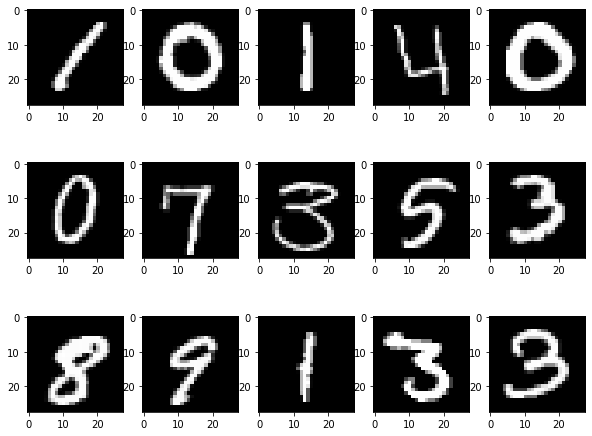

In [20]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]), cmap='gray')

In [23]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# Preprocessing

In [64]:
np.unique(x1).max()

1.0

In [40]:
np.unique(y1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [33]:
#x1 normalization 
x1 = x1/255

#reshape de l'image
nb_image = x1.shape[0]
heigth = 28
width = 28
train_image = heigth * width
x1 = x1.reshape(nb_image, heigth, width, 1)


#adding categorical 
y1 = tf.keras.utils.to_categorical(y1, 10)

In [66]:
x1.shape

(42000, 28, 28, 1)

In [183]:
y1[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [79]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [139]:
def validation_curve(hist):
    
    plt.figure(figsize=(10,10))
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'Validation'], loc='upper left')
    plt.show()
    
def validation_accuracy_curve(hist):
    
    plt.figure(figsize=(10,10))
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'Validation'], loc='upper left')
    plt.show()

# Debut de l'architecture

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=.3, random_state=1)

In [52]:
print(X_train.shape)
print(y_train.shape)

(29400, 28, 28, 1)
(29400, 10)


In [106]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import MaxPooling2D

import keras.backend as K
from keras.callbacks import Callback
from tensorflow import keras

In [55]:
input_dim = X_train.shape[1:]

In [99]:
X_train.shape[1:]

(28, 28, 1)

In [98]:
input_dim

(28, 28, 1)

In [292]:
model = Sequential()
#input layer
model.add(Conv2D(64,(3,3), input_shape=input_dim)) 


#hidden layers
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
#outpout layer
model.add(Dense(10, activation='softmax'))

In [293]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 flatten_24 (Flatten)        (None, 288)             

In [294]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [295]:
validation_split = 0.2
history = model.fit(X_train, y_train, validation_split=validation_split, batch_size=32, epochs=20)

Epoch 1/20
735/735 [==============================] - 26s 34ms/step - loss: 0.2758 - accuracy: 0.9142 - val_loss: 0.0941 - val_accuracy: 0.9702
Epoch 2/20
735/735 [==============================] - 25s 34ms/step - loss: 0.0776 - accuracy: 0.9759 - val_loss: 0.0645 - val_accuracy: 0.9789
Epoch 3/20
735/735 [==============================] - 25s 34ms/step - loss: 0.0505 - accuracy: 0.9843 - val_loss: 0.0636 - val_accuracy: 0.9791
Epoch 4/20
735/735 [==============================] - 28s 38ms/step - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.0555 - val_accuracy: 0.9835
Epoch 5/20
735/735 [==============================] - 32s 43ms/step - loss: 0.0303 - accuracy: 0.9896 - val_loss: 0.0643 - val_accuracy: 0.9815
Epoch 6/20
735/735 [==============================] - 26s 35ms/step - loss: 0.0255 - accuracy: 0.9917 - val_loss: 0.0536 - val_accuracy: 0.9830
Epoch 7/20
735/735 [==============================] - 28s 39ms/step - loss: 0.0201 - accuracy: 0.9924 - val_loss: 0.0637 - val_accuracy:

In [296]:
y_pred = model.predict(X_test)

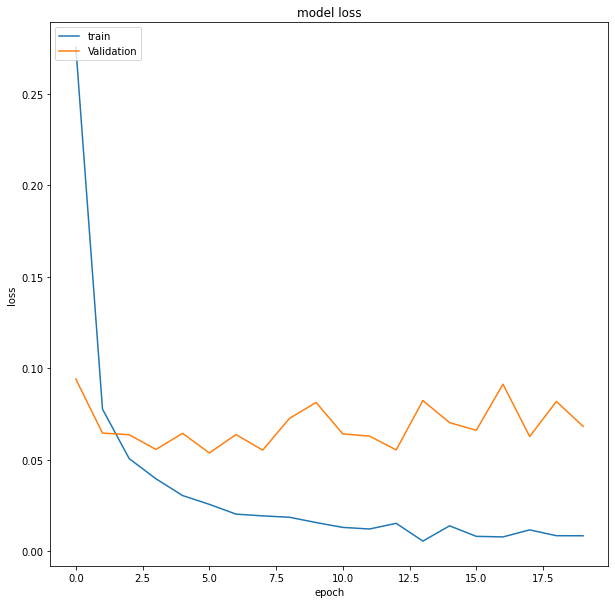

In [297]:
validation_curve(history)

In [298]:
y_pred

array([[2.23380044e-13, 1.00000000e+00, 3.18165546e-12, ...,
        3.94695974e-08, 2.40687559e-09, 4.23545232e-13],
       [5.35231497e-21, 6.93868773e-19, 1.22331301e-19, ...,
        9.26254777e-22, 9.22765137e-18, 4.22254183e-15],
       [5.53624488e-20, 1.78974782e-12, 1.00000000e+00, ...,
        1.35089314e-15, 2.75672176e-22, 3.66721154e-21],
       ...,
       [7.82563834e-19, 1.08818573e-13, 1.00000000e+00, ...,
        2.08541060e-16, 1.07226895e-18, 6.86064246e-21],
       [3.89844568e-20, 1.83463966e-18, 4.82074911e-15, ...,
        8.00522649e-20, 5.13301161e-15, 4.62215418e-15],
       [1.00000000e+00, 1.45717301e-13, 3.40207077e-15, ...,
        4.94018566e-18, 3.47266771e-14, 2.15060487e-11]], dtype=float32)

In [299]:
print(classification_report(y_test, np.around(y_pred)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1247
           1       1.00      0.99      1.00      1395
           2       0.99      0.98      0.98      1257
           3       0.99      0.99      0.99      1321
           4       0.99      0.98      0.99      1232
           5       0.98      0.99      0.99      1111
           6       0.99      0.99      0.99      1258
           7       0.98      0.97      0.97      1285
           8       0.99      0.98      0.98      1249
           9       0.96      0.99      0.98      1245

   micro avg       0.99      0.99      0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600
 samples avg       0.99      0.99      0.99     12600



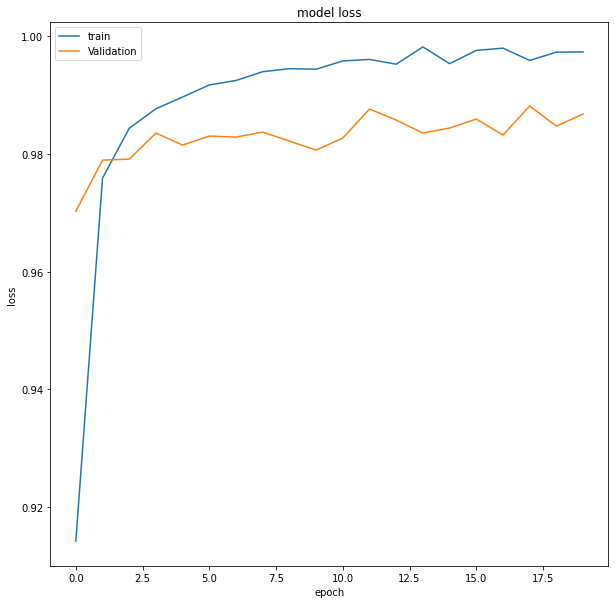

In [300]:
validation_accuracy_curve(history)